## Hofstede’s Six Dimensions Clustering - comparing and contrasting cultures of different countries based on six anthropological areas that define various societies

With the drive towards globalization gaining steam in the past decade, cultural integration especially at workplace is increasingly becoming an important tool for gaining the much-needed competitive advantage. Understanding and appreciating cultural differences between countries is critical in effectively and efficiently managing diverse workforce especially for multinational corporations. Hofstede’s Six Dimensions provide an insightful platform for comparing and contrasting cultures of different countries based on six anthropological areas that define various societies.

In [31]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from scipy.spatial.distance import cdist
import plotly.express as px
from sklearn.decomposition import PCA
from adjustText import adjust_text

## Basic data engineering

In [32]:
df = pd.read_csv('6-dimensions-for-website-2015-08-16.csv', sep=';', header=0)

In [33]:
cols = df.columns[1:]

In [34]:
df = df[cols]

In [35]:
df = df.replace('#NULL!',np.nan)

In [36]:
df = df.dropna(axis=0)

In [37]:
features = ['pdi', 'idv', 'mas', 'uai', 'ltowvs', 'ivr']

In [38]:
m = pd.DataFrame([['Magda', 64, 86, 50, 39, 64, 64]], columns=df.columns)
df = df.append(m)
df = df.reset_index(drop=True)

In [39]:
df.head(10)

,country,pdi,idv,mas,uai,ltowvs,ivr
0,Africa East,64,27,41,52,32,40
1,Africa West,77,20,46,54,9,78
2,Arab countries,80,38,53,68,23,34
3,Argentina,49,46,56,86,20,62
4,Australia,38,90,61,51,21,71
5,Austria,11,55,79,70,60,63
6,Bangladesh,80,20,55,60,47,20
7,Belgium,65,75,54,94,82,57
8,Brazil,69,38,49,76,44,59
9,Bulgaria,70,30,40,85,69,16


## Choosing number of clusters

## K-means clustering for n_clusters=13

In [40]:
kmeans = KMeans(n_clusters=13, random_state=10)
df["cluster"] = kmeans.fit_predict(df[features])

## Clusters visualisation

In [41]:
df = df.replace('U.S.A.','United States of America')
df = df.replace('Czech Rep','Czechia')
df = df.replace('Great Britain','United Kingdom')
df = df.replace('Korea South','South Korea')
df = df.replace('Macedonia Rep','Macedonia')
df = df.replace('Slovak Rep','Slovakia')
df = df.replace('Bosnia','Bosnia and Herz.')
df = df.replace('Dominican Rep','Dominican Rep.')

In [42]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [43]:
world = world.merge(df, left_on = "name", right_on = "country", how='left')

Cluster number  4.0
Cluster number  3.0
Cluster number  1.0
Cluster number  8.0
Cluster number  2.0
Cluster number  6.0
Cluster number  7.0
Cluster number  11.0
Cluster number  10.0
Cluster number  5.0
Cluster number  9.0
Cluster number  0.0
Cluster number  12.0


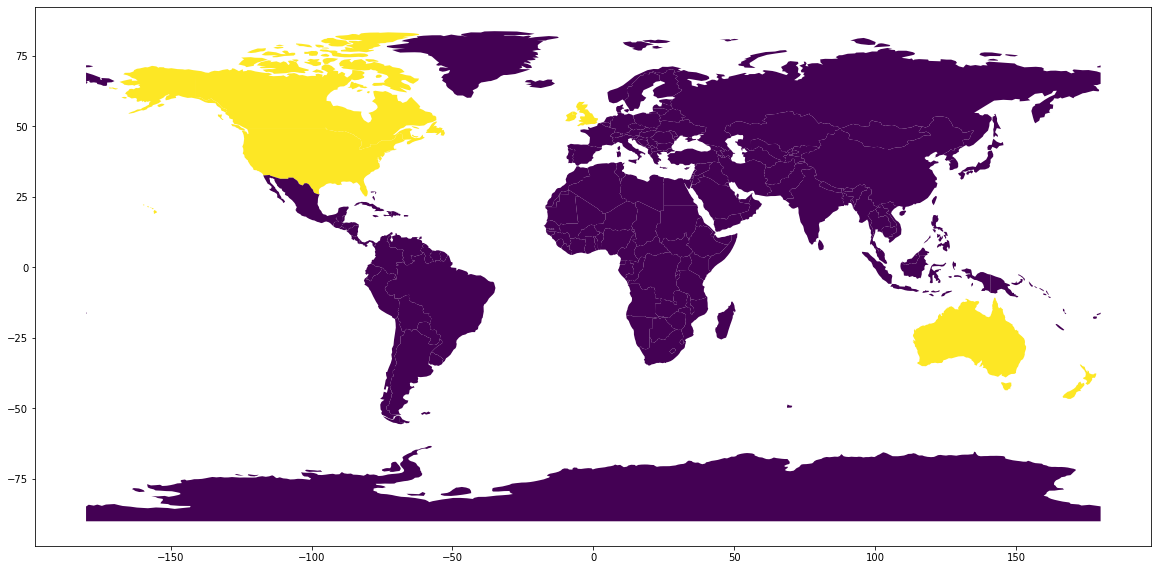

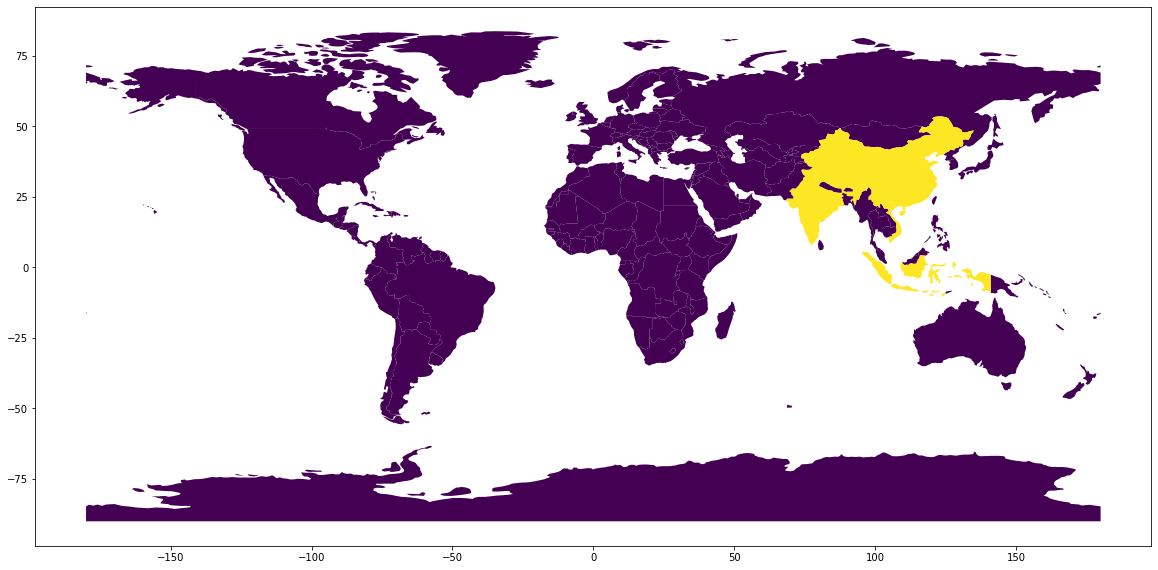

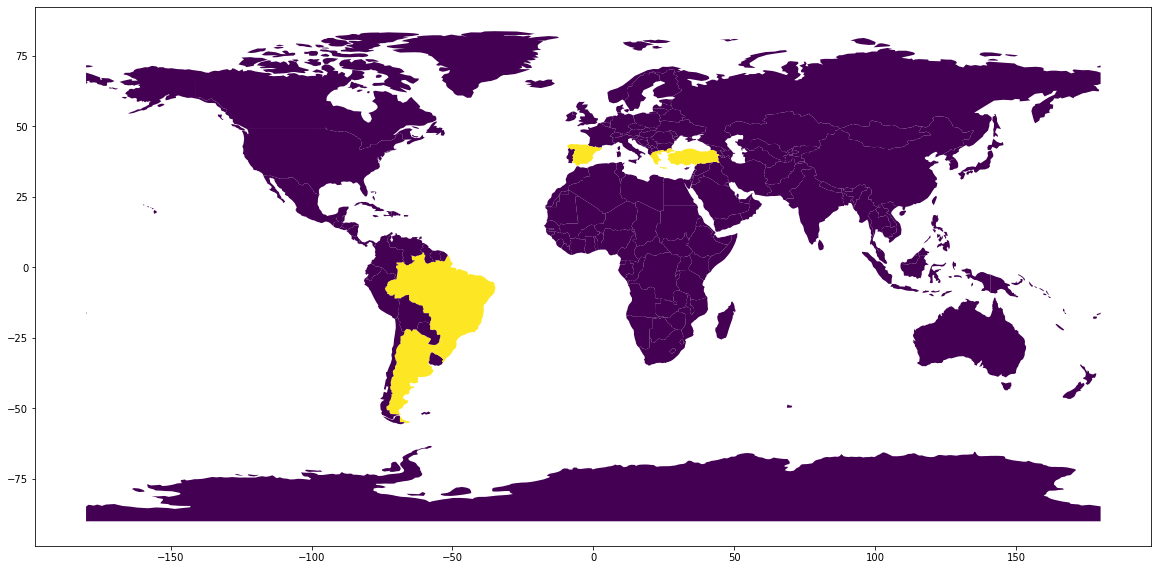

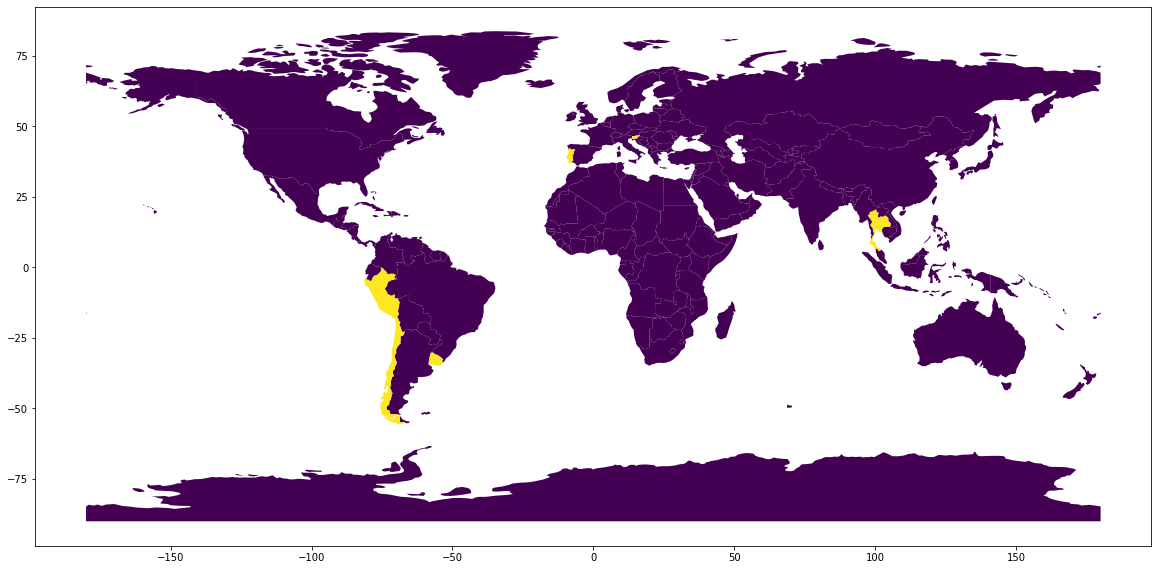

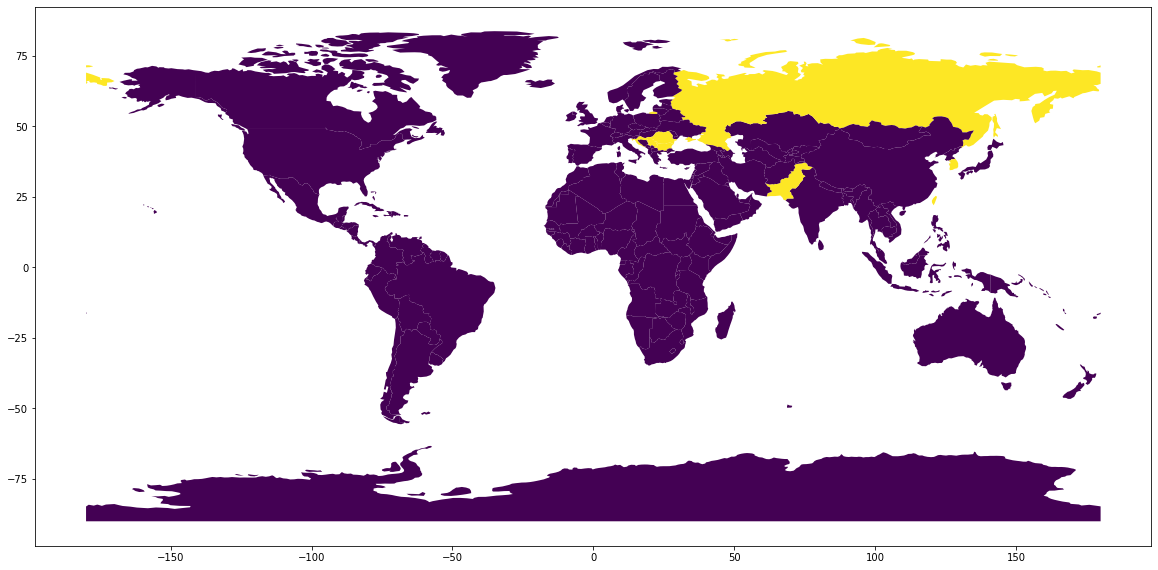

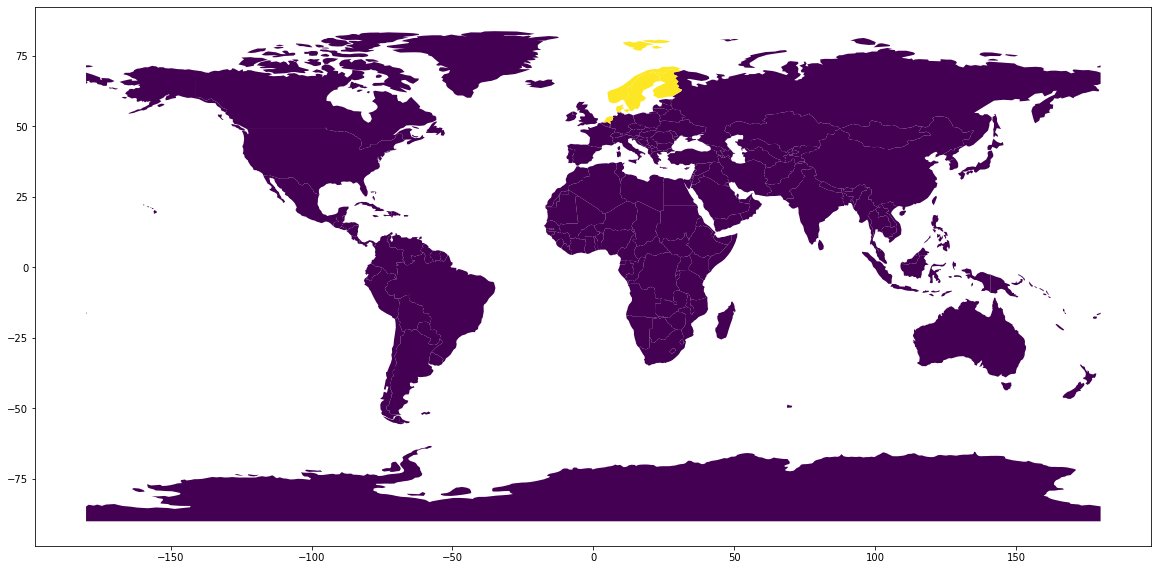

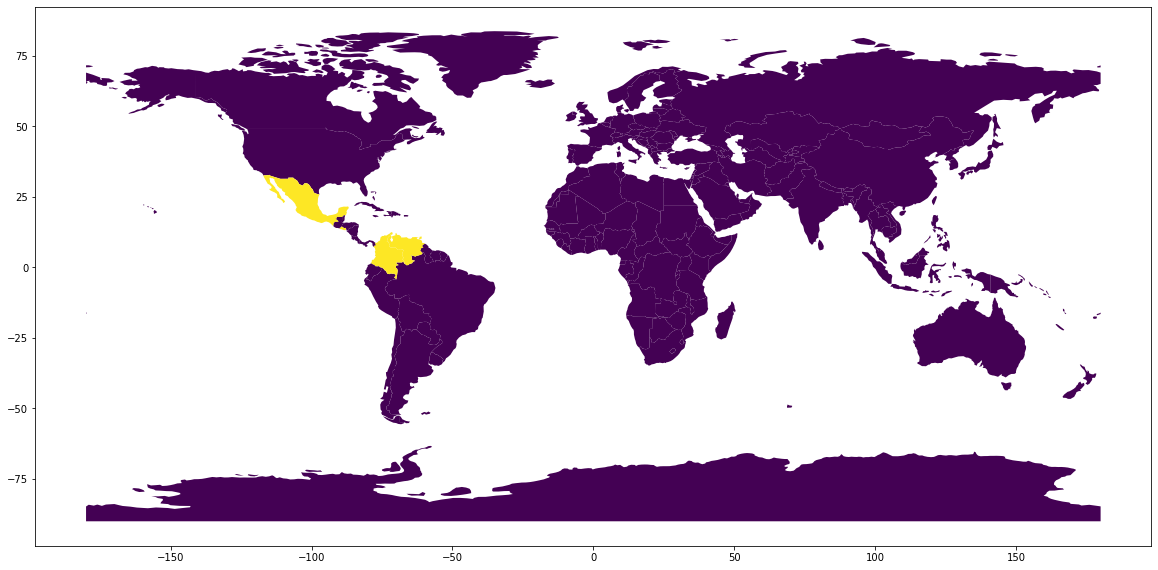

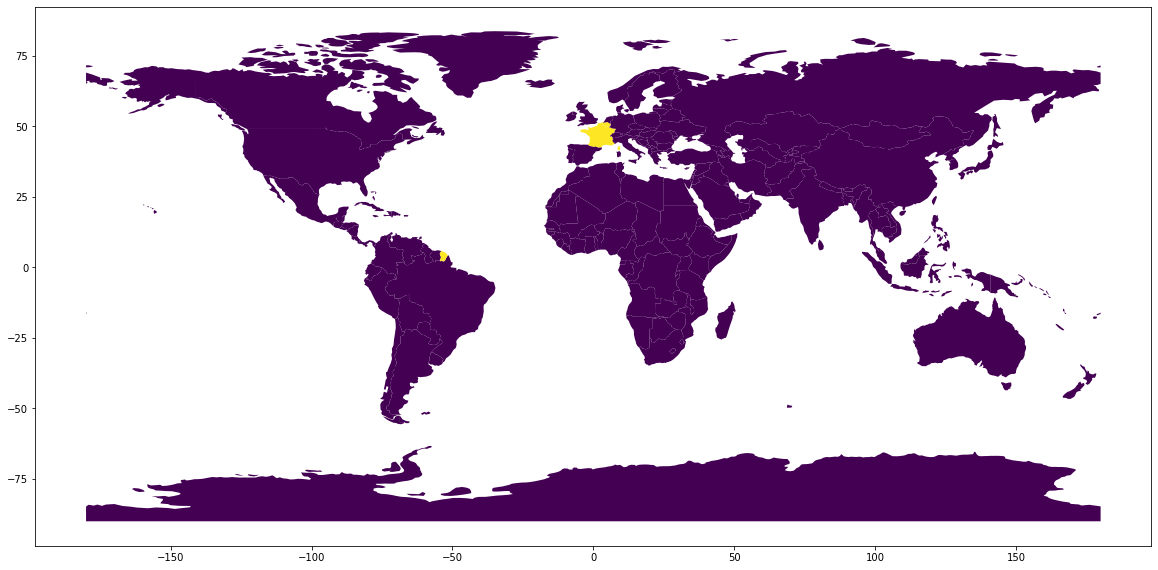

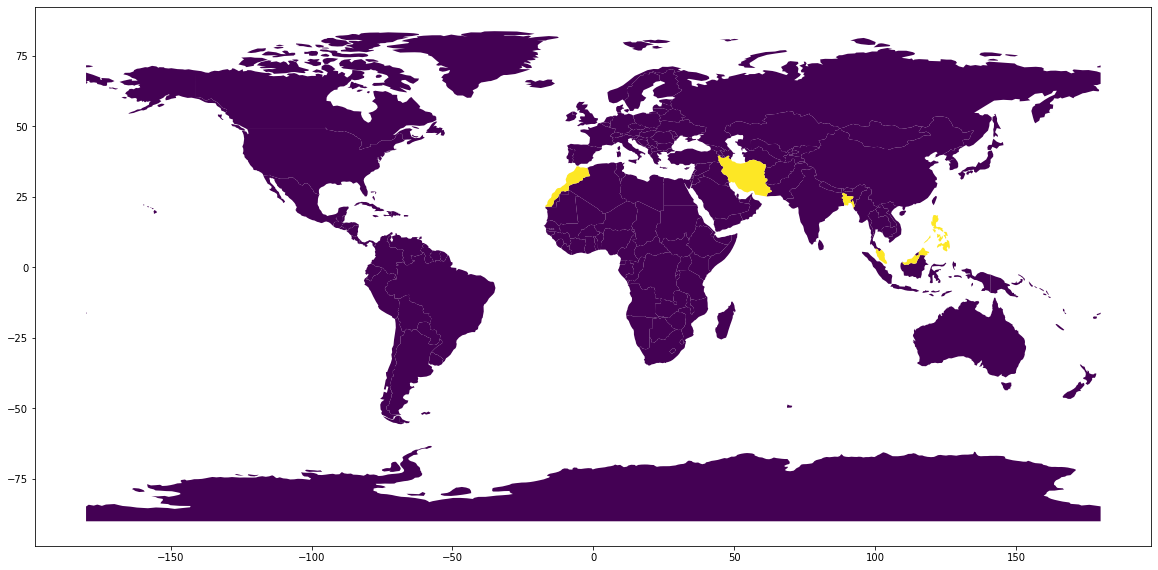

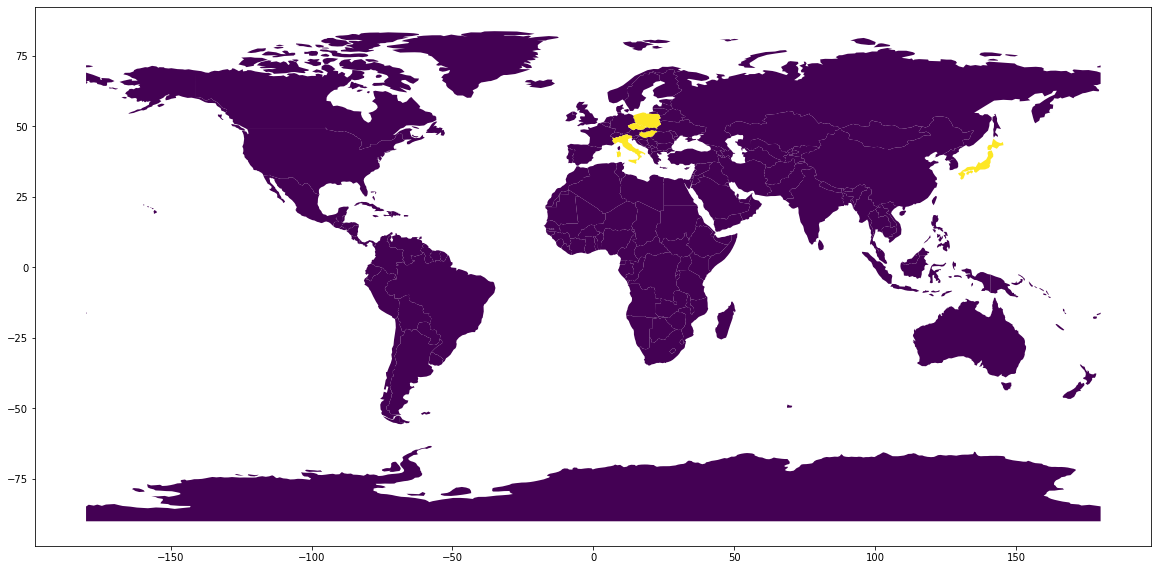

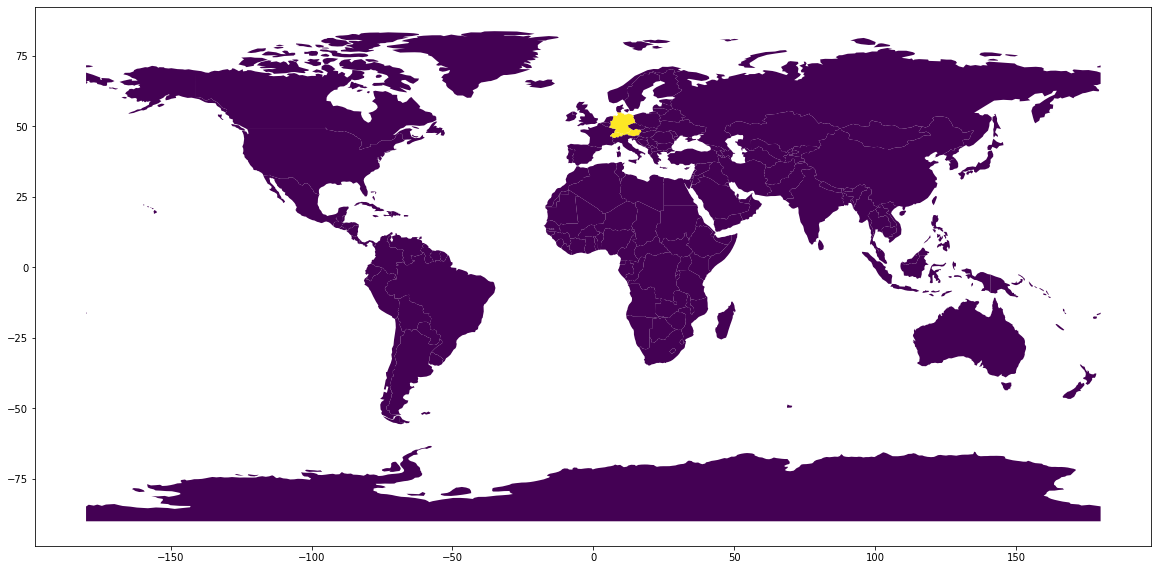

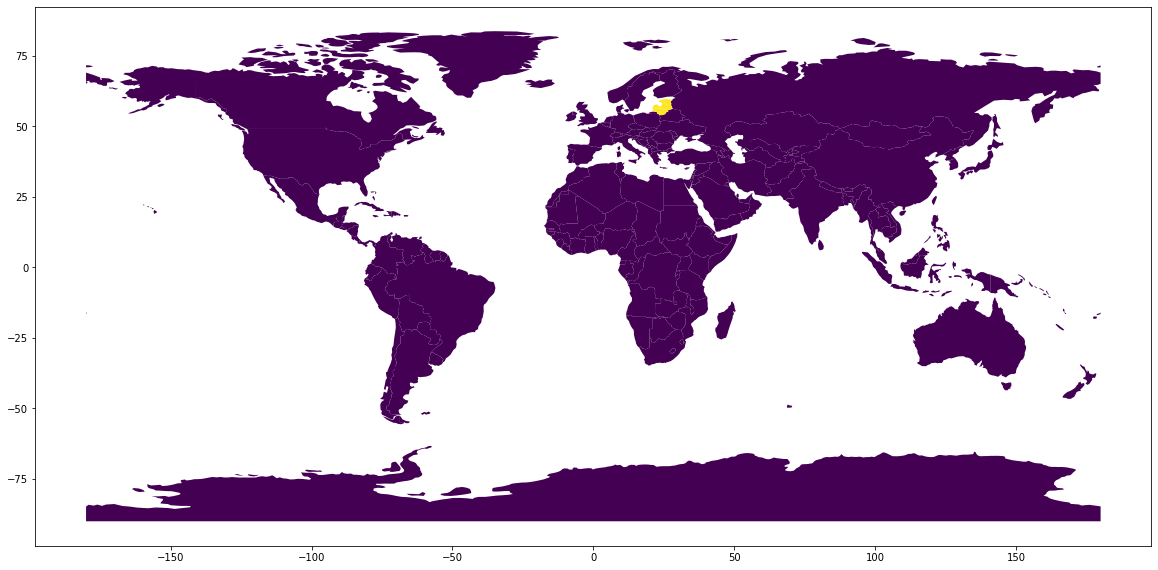

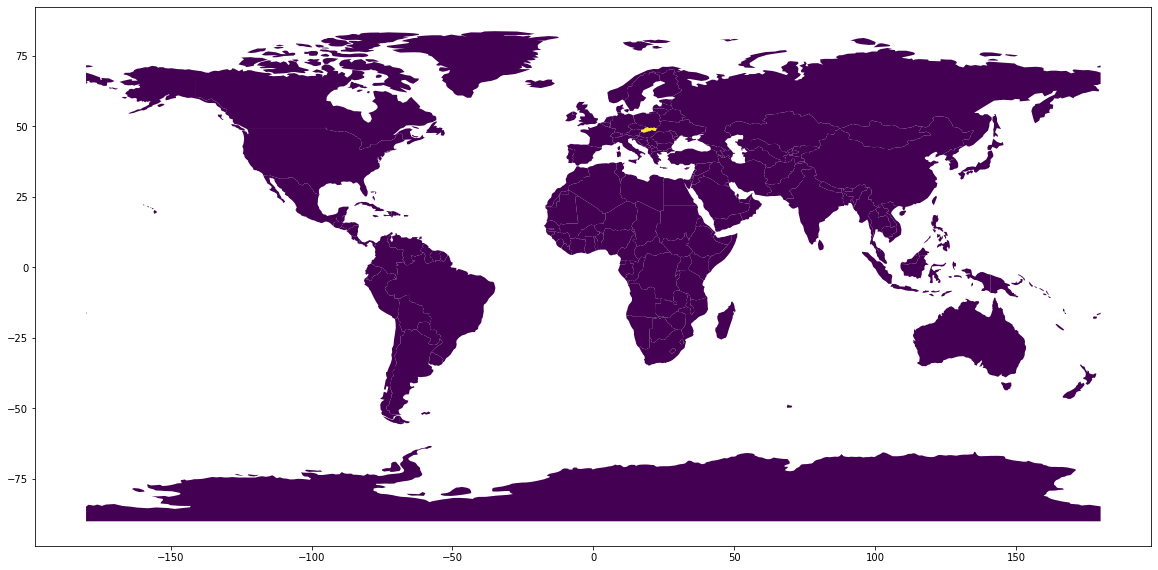

In [14]:
for n in world.cluster.unique():
    world['temp'] = np.where(world['cluster']== n, 1, 0)
    if world['temp'].sum() > 0: 
        fig, ax = plt.subplots(1, 1, figsize=(20, 20))
        print('Cluster number ', n)
        world.plot(column = 'temp', ax=ax, legend=False, 
                   missing_kwds={'color': 'lightgrey'})

## Own personal culture 

In [44]:
m = pd.DataFrame([[64, 86, 50, 39, 64, 64]], columns=features)
res = kmeans.predict(m)

In [45]:
res

array([4], dtype=int32)

In [106]:
c4 = world[world['cluster']==4]

In [107]:
c4

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,pdi,idv,mas,uai,ltowvs,ivr,cluster
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,39,80,52,48,36,68,4.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,40,91,62,46,26,68,4.0
133,5011102,Europe,Ireland,IRL,322000.0,"POLYGON ((-6.19788 53.86757, -6.03299 53.15316...",Ireland,28,70,68,35,24,65,4.0
136,4510327,Oceania,New Zealand,NZL,174800.0,"MULTIPOLYGON (((176.88582 -40.06598, 176.50802...",New Zealand,22,79,58,49,33,75,4.0
137,23232413,Oceania,Australia,AUS,1189000.0,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",Australia,38,90,61,51,21,71,4.0
143,64769452,Europe,United Kingdom,GBR,2788000.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",United Kingdom,35,89,66,35,51,69,4.0


## Saving results

In [95]:
df.to_csv('clusters.csv')

## Principal component analysis and visualisation

In [49]:
pca = PCA(3)

In [50]:
data = pca.fit_transform(df[features])

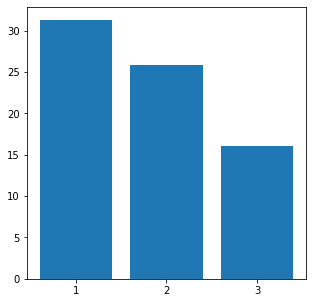

In [51]:
plt.figure(figsize=(5,5))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

In [52]:
colors =['blue','green','black','red', 'pink', 'purple','purple', 'brown', 
         'darkgrey', 'orange', 'khaki', 'magenta', 'coral']

In [60]:
pca_df = pd.DataFrame(data, columns = ['pca1','pca2','pca3'])

In [63]:
df = df.merge(pca_df, left_index=True, right_index=True)

In [64]:
df

,country,pdi,idv,mas,uai,ltowvs,ivr,cluster,pca1,pca2,pca3
0,Africa East,64,27,41,52,32,40,10,-10.936763,12.488736,20.681023
1,Africa West,77,20,46,54,9,78,7,-6.643655,55.045903,22.015536
2,Arab countries,80,38,53,68,23,34,10,-19.764694,16.300651,6.470163
3,Argentina,49,46,56,86,20,62,1,7.396952,30.680723,-20.762384
4,Australia,38,90,61,51,21,71,4,57.059511,16.861616,-3.193912
...,...,...,...,...,...,...,...,...,...,...,...
61,United States of America,40,91,62,46,26,68,4,56.590056,10.791134,1.571197
62,Uruguay,61,36,38,100,26,53,8,-13.812757,26.462678,-27.727270
63,Venezuela,81,12,73,76,16,100,7,-14.773969,68.046792,2.081681
64,Vietnam,70,20,40,30,57,35,3,-15.868188,-8.852963,43.730884


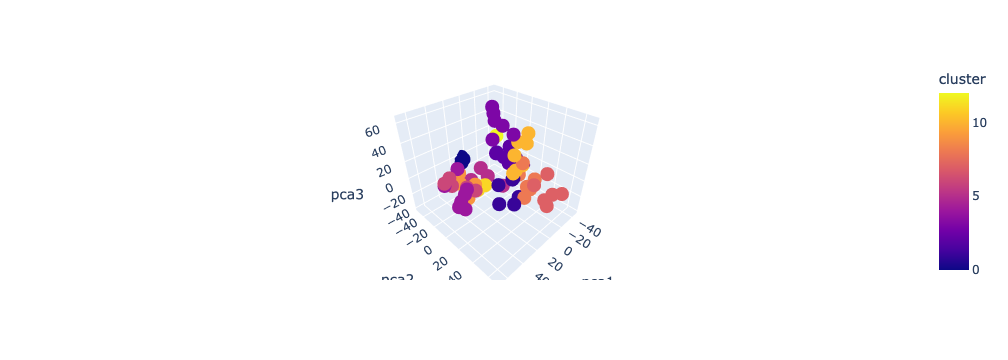

In [74]:
fig = px.scatter_3d(df, x='pca1', y='pca2', z='pca3',
                    color='cluster', hover_name="country")
fig.show()   #3d viz of PCA

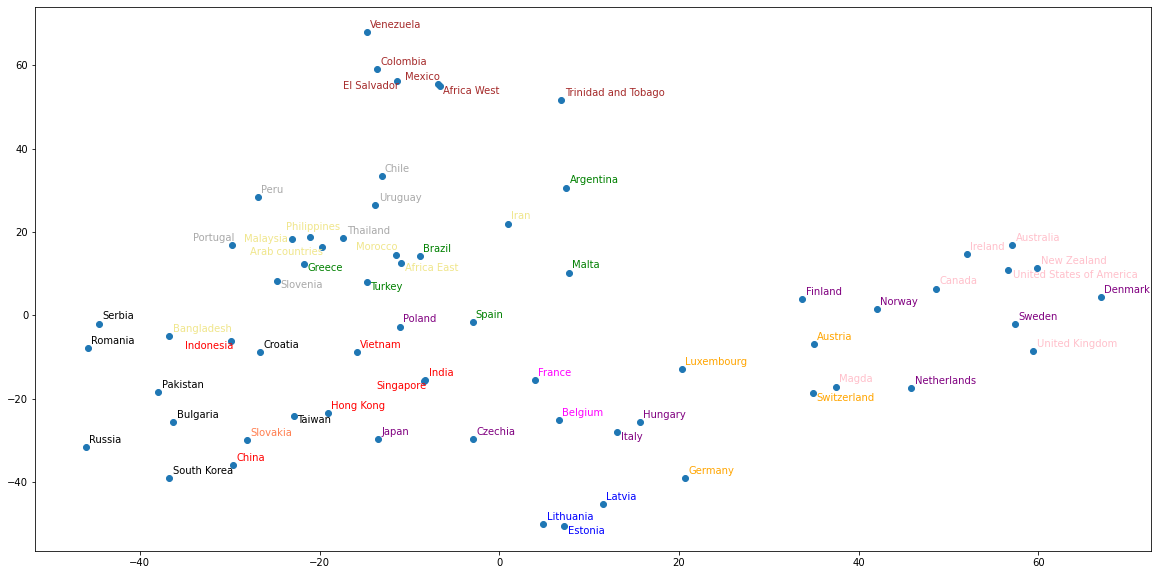

In [111]:
plt.figure(figsize=(20,10))
plt.scatter(df['pca1'], df['pca2'])
cluster = df['cluster']
texts = []  

for n in np.unique(cluster):
    ind = np.where((cluster == n))[0].tolist()
    for i in ind:
        label =  df.country.values[i]
        texts.append(plt.annotate(label, xy = (df[['pca1']].values[i], df[['pca2']].values[i]),
                     xytext=(df[['pca1']].values[i]+.3,df[['pca2']].values[i]+.3),
                     color = colors[n]))
adjust_text(texts)
plt.show()   #2d viz of PCA